In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

In [2]:
df_sandbox_calls = pd.read_csv('Sandbox_Calls.csv',index_col=0)

In [37]:
df_sandbox_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13674558 entries, 0 to 1536183
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   apiproxy     object        
 1   Date         datetime64[ns]
 2   No_of_Calls  int64         
 3   No_Of_Calls  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 521.6+ MB


In [5]:
df_sandbox_calls.head(2)

,apiproxy,is_error,client_received_start_timestamp
0,S4HANACloudAPIs,1,2020-06-11 23:59:59.144
1,S4HANACloudAPIs,1,2020-06-14 23:59:57.513


In [6]:
df_sandbox_calls['Date'] = pd.to_datetime(df_sandbox_calls['client_received_start_timestamp'])

In [7]:
df_sandbox_calls = df_sandbox_calls[['apiproxy','Date']]
df_sandbox_calls['No_of_Calls'] = 1

In [8]:
df_sandbox_calls.head(2)

,apiproxy,Date,No_of_Calls
0,S4HANACloudAPIs,2020-06-11 23:59:59.144,1
1,S4HANACloudAPIs,2020-06-14 23:59:57.513,1


In [9]:
df_sandbox = df_sandbox_calls[['apiproxy','Date']]
df_sandbox.head(2)

,apiproxy,Date
0,S4HANACloudAPIs,2020-06-11 23:59:59.144
1,S4HANACloudAPIs,2020-06-14 23:59:57.513


In [10]:
df_sandbox.apiproxy.value_counts()

SuccessFactors                        9378086
S4HANACloudAPIs                       2882619
CloudPlatformIntegration               590624
SAPAribaOpenAPIs                       265405
SAPCleaProductImageClassification      103498
                                       ...   
FinancialCloudAPI                           1
SAPCPMasterDataforBusinessPartners          1
saptest                                     1
SAPByD                                      1
SAPCleaResumeMatcher                        1
Name: apiproxy, Length: 170, dtype: int64

In [11]:
!pip install sidetable

In [12]:
import sidetable
# sidetable is mix of crosstab, groupby and value_counts
# sidetable can also be used for groupby totals, counts, subtotal, missing values, flattening table
# check the article https://github.com/chris1610/sidetable
df_sandbox.stb.freq(['apiproxy'],style = True, thresh = 99, other_label='Rest of Proxies')

C:\Users\I069554\Anaconda3\lib\site-packages\sidetable\sidetable.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results[results[other_label] == False].append(


,apiproxy,count,percent,cumulative_count,cumulative_percent
0,SuccessFactors,"9,378,086",68.58%,"9,378,086",68.58%
1,S4HANACloudAPIs,"2,882,619",21.08%,"12,260,705",89.66%
2,CloudPlatformIntegration,"590,624",4.32%,"12,851,329",93.98%
3,SAPAribaOpenAPIs,"265,405",1.94%,"13,116,734",95.92%
4,SAPCleaProductImageClassification,"103,498",0.76%,"13,220,232",96.68%
5,SAPCloudforCustomer,"89,537",0.65%,"13,309,769",97.33%
6,DataqualityMicroservices,"51,494",0.38%,"13,361,263",97.71%
7,SAPCPServicesProductConfiguration,"38,015",0.28%,"13,399,278",97.99%
8,SAPOmniChannelBanking,"25,879",0.19%,"13,425,157",98.18%
9,APIPortal,"25,475",0.19%,"13,450,632",98.36%


In [13]:
df_sandbox.head()

,apiproxy,Date
0,S4HANACloudAPIs,2020-06-11 23:59:59.144
1,S4HANACloudAPIs,2020-06-14 23:59:57.513
2,CloudPlatformIntegration,2020-06-20 23:59:51.960
3,SAPAribaOpenAPIs,2020-06-23 23:59:57.327
4,TranslationHub,2020-06-01 00:00:10.738


In [16]:
df_sandbox["No_Of_Calls"] = 1

In [38]:
#Pivot table using Grouper function
df_analysis_grouper = df_sandbox.pivot_table(index=pd.Grouper(key='Date', freq='M'),values=['apiproxy','No_Of_Calls'],aggfunc = np.sum)
df_analysis_grouper.head()

,No_Of_Calls
Date,
2020-06-30,217940
2020-07-31,309127
2020-08-31,560247
2020-09-30,654570
2020-10-31,579713


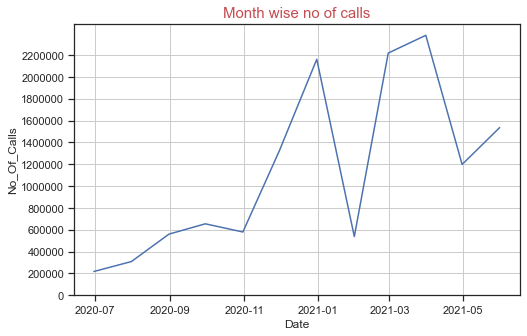

In [39]:
plt.figure(figsize=(8,5))
sns.set(style="ticks")
ax1 = sns.lineplot(x='Date',y='No_Of_Calls',data=df_analysis_grouper)
# To avoid y axis values to convert in exponential format
ax1.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title(label = 'Month wise no of calls',fontdict = {"fontsize":"15","color":"r"})
plt.yticks(np.arange(0,2400000,200000 ))
plt.grid()
plt.show()

In [19]:
df_sandbox.head(2)

,apiproxy,Date,No_Of_Calls
0,S4HANACloudAPIs,2020-06-11 23:59:59.144,1
1,S4HANACloudAPIs,2020-06-14 23:59:57.513,1


In [20]:
#groupby using Grouper function
df_analysis_groupby = df_sandbox.groupby(['apiproxy',pd.Grouper(key = 'Date', freq='M')])["No_Of_Calls"].sum()
df_analysis_groupby.head()

apiproxy   Date      
APIPortal  2020-06-30    1716
           2020-07-31    1418
           2020-08-31    3198
           2020-09-30    3676
           2020-10-31    2846
Name: No_Of_Calls, dtype: int64

In [21]:
df_analysis_groupby=df_analysis_groupby.reset_index()
df_analysis_groupby.head()

,apiproxy,Date,No_Of_Calls
0,APIPortal,2020-06-30,1716
1,APIPortal,2020-07-31,1418
2,APIPortal,2020-08-31,3198
3,APIPortal,2020-09-30,3676
4,APIPortal,2020-10-31,2846


In [22]:
df_analysis_groupby = df_analysis_groupby.sort_values(by=['apiproxy','Date'],ascending=[True,False]).groupby(by='apiproxy').head(2)
df_analysis_groupby.head()

,apiproxy,Date,No_Of_Calls
11,APIPortal,2021-05-31,1899
10,APIPortal,2021-04-30,2069
14,AlgorandBlockchainIntegration,2021-05-31,26
13,AlgorandBlockchainIntegration,2021-04-30,13
16,ApplicationAutoscaler,2021-05-31,6


In [23]:
#Filtering only april/may 2021 records
df_analysis_groupby = df_analysis_groupby.query("Date == '2021-05-31' or Date == '2021-04-30'")
df_analysis_groupby.head()

,apiproxy,Date,No_Of_Calls
11,APIPortal,2021-05-31,1899
10,APIPortal,2021-04-30,2069
14,AlgorandBlockchainIntegration,2021-05-31,26
13,AlgorandBlockchainIntegration,2021-04-30,13
16,ApplicationAutoscaler,2021-05-31,6


In [40]:
#Percentage change in last 2 months
df_pct_change = df_analysis_groupby
df_pct_change['Pct_Change'] = df_pct_change.sort_values(by=['apiproxy','Date']).groupby(by = ['apiproxy'],sort=False)['No_Of_Calls'].apply(pd.Series.pct_change)
df_pct_change.head(10)

,apiproxy,Date,No_Of_Calls,Pct_Change
11,APIPortal,2021-05-31,1899,-0.082165
10,APIPortal,2021-04-30,2069,NaN
14,AlgorandBlockchainIntegration,2021-05-31,26,1.000000
13,AlgorandBlockchainIntegration,2021-04-30,13,NaN
16,ApplicationAutoscaler,2021-05-31,6,-0.846154
15,ApplicationAutoscaler,2021-04-30,39,NaN
23,B1RaiseFaultProxy,2021-05-31,1,NaN
35,CloudPlatformIntegration,2021-05-31,36920,0.346070
34,CloudPlatformIntegration,2021-04-30,27428,NaN
55,Cryptowerk,2021-05-31,1,0.000000


In [25]:
df_prev_month = df_pct_change.query("No_Of_Calls>100 and Date=='2021-04-30'")
df_prev_month

,apiproxy,Date,No_Of_Calls,Pct_Change
10,APIPortal,2021-04-30,2069,NaN
34,CloudPlatformIntegration,2021-04-30,27428,NaN
105,DevPortalAPI,2021-04-30,482,NaN
413,S4B_Banking,2021-04-30,632,NaN
425,S4HANACloudAPIs,2021-04-30,216143,NaN
477,SAPAPIManagement_CF_APIPortal,2021-04-30,925,NaN
483,SAPAPIManagement_CF_DevPortal,2021-04-30,508,NaN
498,SAPAribaOpenAPIs,2021-04-30,18481,NaN
510,SAPAssetIntelligentNetwork,2021-04-30,507,NaN
522,SAPBusinessOneCloud,2021-04-30,1221,NaN


In [26]:
df_curr_month = df_pct_change.query("No_Of_Calls>100 and Date=='2021-05-31' and Pct_Change>0")
df_curr_month

,apiproxy,Date,No_Of_Calls,Pct_Change
35,CloudPlatformIntegration,2021-05-31,36920,0.346070
106,DevPortalAPI,2021-05-31,509,0.056017
138,EPD_VISUALIZATION_STORAGE,2021-05-31,8296,179.347826
426,S4HANACloudAPIs,2021-05-31,300448,0.390043
478,SAPAPIManagement_CF_APIPortal,2021-05-31,985,0.064865
480,SAPAPIManagement_CF_APIPortal_Analytics,2021-05-31,180,8.000000
484,SAPAPIManagement_CF_DevPortal,2021-05-31,964,0.897638
499,SAPAribaOpenAPIs,2021-05-31,20279,0.097289
511,SAPAssetIntelligentNetwork,2021-05-31,9450,17.639053
588,SAPCPServicesPricing,2021-05-31,436,1.369565


In [57]:
df_consolidated_col = df_curr_month.merge(df_prev_month,how='inner',on='apiproxy')
df_consolidated_col.sort_values(by='Pct_Change_x',ascending=False, inplace=True)
df_consolidated_col.head()

,apiproxy,Date_x,No_Of_Calls_x,Pct_Change_x,Date_y,No_Of_Calls_y,Pct_Change_y
6,SAPAssetIntelligentNetwork,2021-05-31,9450,17.639053,2021-04-30,507,NaN
10,SAPCloudforCustomer,2021-05-31,28506,2.455273,2021-04-30,8250,NaN
7,SAPCPServicesPricing,2021-05-31,436,1.369565,2021-04-30,184,NaN
4,SAPAPIManagement_CF_DevPortal,2021-05-31,964,0.897638,2021-04-30,508,NaN
2,S4HANACloudAPIs,2021-05-31,300448,0.390043,2021-04-30,216143,NaN


In [58]:
df_consolidated_col['Pct_Change_x'] = df_consolidated_col.Pct_Change_x.apply(lambda x: x*100)
df_consolidated_col.head()

,apiproxy,Date_x,No_Of_Calls_x,Pct_Change_x,Date_y,No_Of_Calls_y,Pct_Change_y
6,SAPAssetIntelligentNetwork,2021-05-31,9450,1763.905325,2021-04-30,507,NaN
10,SAPCloudforCustomer,2021-05-31,28506,245.527273,2021-04-30,8250,NaN
7,SAPCPServicesPricing,2021-05-31,436,136.956522,2021-04-30,184,NaN
4,SAPAPIManagement_CF_DevPortal,2021-05-31,964,89.763780,2021-04-30,508,NaN
2,S4HANACloudAPIs,2021-05-31,300448,39.004270,2021-04-30,216143,NaN


[]

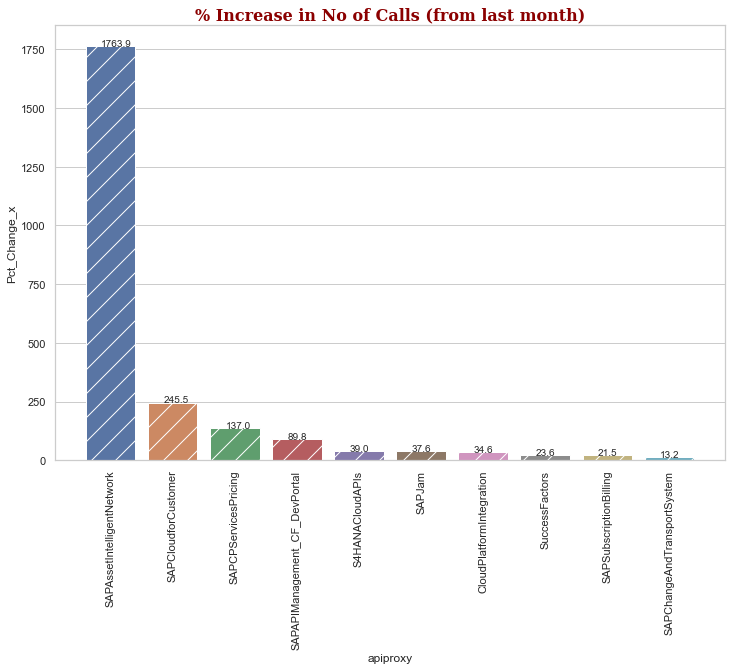

In [80]:
%matplotlib inline

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

ax = sns.barplot(x='apiproxy', y='Pct_Change_x', data=df_consolidated_col.head(10),hatch='/')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.1))

plt.title("% Increase in No of Calls (from last month)",fontdict={'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,})
plt.xticks(rotation=90)
plt.plot()

In [90]:
df_curr_month_decrease = df_pct_change.query("No_Of_Calls>10 and Date=='2021-05-31' and Pct_Change<0")
df_curr_month_decrease['Pct_Change'] = df_curr_month_decrease.Pct_Change.apply(lambda x: x*100)
df_curr_month_decrease = df_curr_month_decrease.sort_values(by='Pct_Change')
df_curr_month_decrease.head()

C:\Users\I069554\AppData\Local\Temp\ipykernel_36004\3115509321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr_month_decrease['Pct_Change'] = df_curr_month_decrease.Pct_Change.apply(lambda x: x*100)


,apiproxy,Date,No_Of_Calls,Pct_Change
1198,TranslationHub,2021-05-31,192,-68.000000
600,SAPCPServicesProductConfiguration,2021-05-31,4554,-60.533842
157,HCPms,2021-05-31,45,-49.438202
94,DataqualityMicroservices,2021-05-31,44,-46.341463
818,SAPHANASpatialServices,2021-05-31,75,-43.609023


In [92]:
df_consolidated_decrease = df_curr_month_decrease.merge(df_prev_month,how='inner',on='apiproxy')
df_consolidated_decrease.sort_values(by='Pct_Change_x', inplace=True)
df_consolidated_decrease.head()

,apiproxy,Date_x,No_Of_Calls_x,Pct_Change_x,Date_y,No_Of_Calls_y,Pct_Change_y
0,TranslationHub,2021-05-31,192,-68.000000,2021-04-30,600,NaN
1,SAPCPServicesProductConfiguration,2021-05-31,4554,-60.533842,2021-04-30,11539,NaN
2,SAPHANASpatialServices,2021-05-31,75,-43.609023,2021-04-30,133,NaN
3,SAPIntegratedBusinessPlanning,2021-05-31,452,-34.397678,2021-04-30,689,NaN
4,SAPBusinessOneCloud,2021-05-31,1067,-12.612613,2021-04-30,1221,NaN


[]

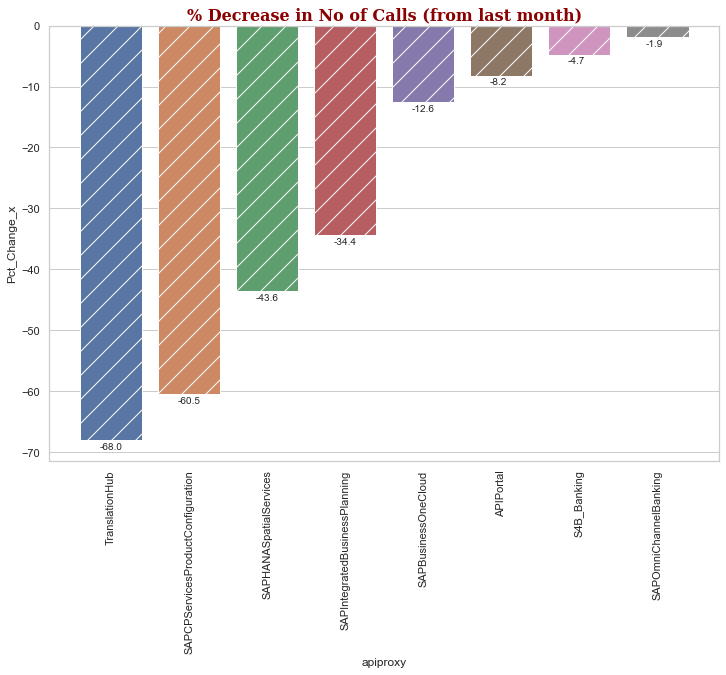

In [100]:
%matplotlib inline

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

ax = sns.barplot(x='apiproxy', y='Pct_Change_x', data=df_consolidated_decrease.head(10),hatch='/')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()-1.5))

plt.title("% Decrease in No of Calls (from last month)",fontdict={'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,})
plt.xticks(rotation=90)
plt.plot()

In [29]:
# we can also use grouper function on date column (no need to index the Date as we do in resample function)
df_sandbox_calls["No_Of_Calls"] = 1
df_sandbox_calls_monthly = df_sandbox_calls.groupby(['apiproxy',pd.Grouper(key = 'Date', freq='M', origin='2021-01-01')])["No_Of_Calls"].sum().reset_index()

In [141]:
df_sandbox_calls_monthly_S4HANACloudAPIs = df_sandbox_calls_monthly.query("apiproxy == 'SAPCloudforCustomer'")
df_sandbox_calls_monthly_S4HANACloudAPIs

,apiproxy,Date,No_Of_Calls
701,SAPCloudforCustomer,2020-07-31,5
702,SAPCloudforCustomer,2020-08-31,4055
703,SAPCloudforCustomer,2020-09-30,6624
704,SAPCloudforCustomer,2020-10-31,5892
705,SAPCloudforCustomer,2020-11-30,4243
706,SAPCloudforCustomer,2020-12-31,8488
707,SAPCloudforCustomer,2021-01-31,8300
708,SAPCloudforCustomer,2021-02-28,6781
709,SAPCloudforCustomer,2021-03-31,8393
710,SAPCloudforCustomer,2021-04-30,8250


In [47]:
#using sidetable with 'value'
df_sandbox_calls_monthly.stb.freq(['apiproxy'],value='No_Of_Calls', style = True, thresh = 99, other_label='Rest of Proxies')

C:\Users\I069554\Anaconda3\lib\site-packages\sidetable\sidetable.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results[results[other_label] == False].append(


,apiproxy,No_Of_Calls,percent,cumulative_No_Of_Calls,cumulative_percent
0,SuccessFactors,"9,378,086",68.58%,"9,378,086",68.58%
1,S4HANACloudAPIs,"2,882,619",21.08%,"12,260,705",89.66%
2,CloudPlatformIntegration,"590,624",4.32%,"12,851,329",93.98%
3,SAPAribaOpenAPIs,"265,405",1.94%,"13,116,734",95.92%
4,SAPCleaProductImageClassification,"103,498",0.76%,"13,220,232",96.68%
5,SAPCloudforCustomer,"89,537",0.65%,"13,309,769",97.33%
6,DataqualityMicroservices,"51,494",0.38%,"13,361,263",97.71%
7,SAPCPServicesProductConfiguration,"38,015",0.28%,"13,399,278",97.99%
8,SAPOmniChannelBanking,"25,879",0.19%,"13,425,157",98.18%
9,APIPortal,"25,475",0.19%,"13,450,632",98.36%


In [45]:
df_sandbox.head(2)

,apiproxy,Date,No_Of_Calls
0,S4HANACloudAPIs,2020-06-11 23:59:59.144,1
1,S4HANACloudAPIs,2020-06-14 23:59:57.513,1


In [32]:
##using sidetable without value (just to count the no of occurence)
df_sandbox.stb.freq(['apiproxy'],style = True, thresh = 99, other_label='Rest of Proxies')

C:\Users\I069554\Anaconda3\lib\site-packages\sidetable\sidetable.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results[results[other_label] == False].append(


,apiproxy,count,percent,cumulative_count,cumulative_percent
0,SuccessFactors,"9,378,086",68.58%,"9,378,086",68.58%
1,S4HANACloudAPIs,"2,882,619",21.08%,"12,260,705",89.66%
2,CloudPlatformIntegration,"590,624",4.32%,"12,851,329",93.98%
3,SAPAribaOpenAPIs,"265,405",1.94%,"13,116,734",95.92%
4,SAPCleaProductImageClassification,"103,498",0.76%,"13,220,232",96.68%
5,SAPCloudforCustomer,"89,537",0.65%,"13,309,769",97.33%
6,DataqualityMicroservices,"51,494",0.38%,"13,361,263",97.71%
7,SAPCPServicesProductConfiguration,"38,015",0.28%,"13,399,278",97.99%
8,SAPOmniChannelBanking,"25,879",0.19%,"13,425,157",98.18%
9,APIPortal,"25,475",0.19%,"13,450,632",98.36%


<Figure size 1152x648 with 0 Axes>

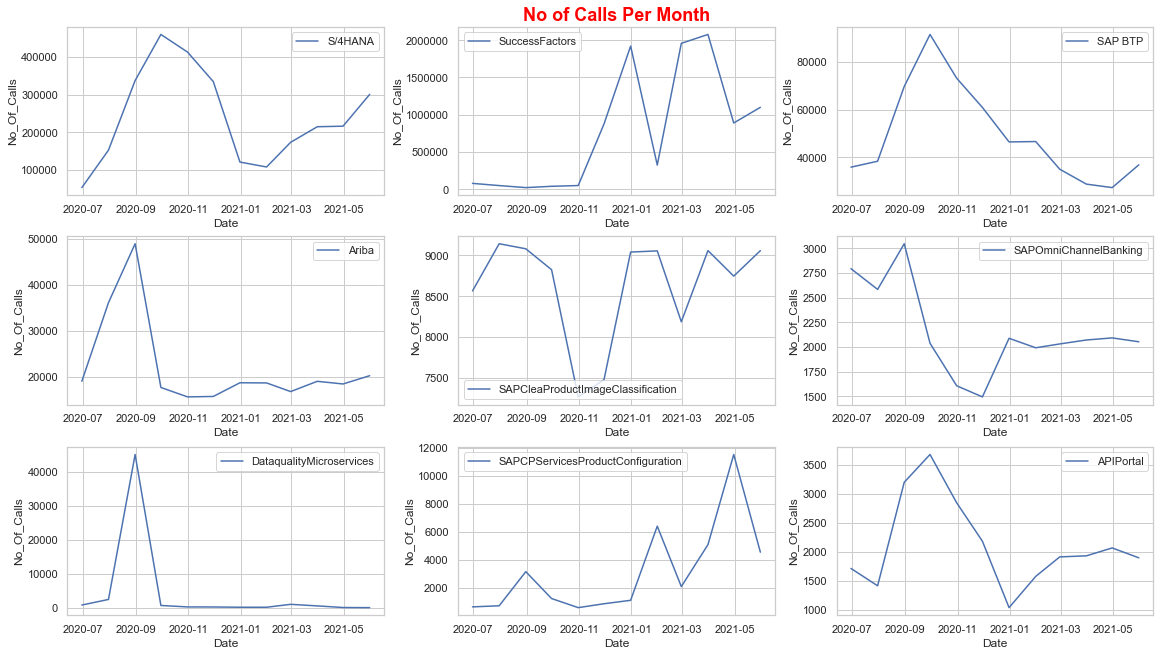

In [143]:
plt.figure(figsize=(16,9))

fig, ax = plt.subplots(3, 3,figsize=(16, 9),constrained_layout=True)
 
# We can use the following arguments to customize the titles of the subplots:

# fontsize: The font size of the title
# loc: The location of the title (“left”, “center”, “right”)
# x, y: The (x, y) coordinates of the title
# color: The font color of the title
# fontweight: The font weight of the title
# plt.show()
sns.lineplot(ax =ax[0][0] ,x='Date', y = 'No_Of_Calls',label='S/4HANA', data=(df_sandbox_calls_monthly.query("apiproxy == 'S4HANACloudAPIs'")))
ax[0][1].ticklabel_format(useOffset=False, style='plain', axis='y')
sns.lineplot(ax =ax[0][1] ,x='Date', y = 'No_Of_Calls',label = 'SuccessFactors', data=(df_sandbox_calls_monthly.query("apiproxy == 'SuccessFactors'")))
ax[0][1].set_title('No of Calls Per Month',fontsize=18, color = 'red',fontweight='bold')
sns.lineplot(ax =ax[0][2] ,x='Date', y = 'No_Of_Calls',label = 'SAP BTP', data=(df_sandbox_calls_monthly.query("apiproxy == 'CloudPlatformIntegration'")))
sns.lineplot(ax =ax[1][0] ,x='Date', y = 'No_Of_Calls',label = 'Ariba', data=(df_sandbox_calls_monthly.query("apiproxy == 'SAPAribaOpenAPIs'")))
sns.lineplot(ax =ax[1][1] ,x='Date', y = 'No_Of_Calls',label = 'SAPCleaProductImageClassification', data=(df_sandbox_calls_monthly.query("apiproxy == 'SAPCleaProductImageClassification'")))
sns.lineplot(ax =ax[1][2] ,x='Date', y = 'No_Of_Calls',label = 'SAPOmniChannelBanking', data=(df_sandbox_calls_monthly.query("apiproxy == 'SAPOmniChannelBanking'")))
sns.lineplot(ax =ax[2][0] ,x='Date', y = 'No_Of_Calls',label = 'DataqualityMicroservices', data=(df_sandbox_calls_monthly.query("apiproxy == 'DataqualityMicroservices'")))
sns.lineplot(ax =ax[2][1],x='Date', y = 'No_Of_Calls',label = 'SAPCPServicesProductConfiguration',data=(df_sandbox_calls_monthly.query("apiproxy == 'SAPCPServicesProductConfiguration'")))

sns.lineplot(ax =ax[2][2] ,x='Date', y = 'No_Of_Calls',label = 'APIPortal', data=(df_sandbox_calls_monthly.query("apiproxy == 'APIPortal'")))
# sns.lineplot(ax =ax[1][0] ,x='Date', y = 'No_Of_Calls',label = 'SAPOmniChannelBanking', data=(df_sandbox_calls_monthly.query("apiproxy == 'SAPOmniChannelBanking'")))
# sns.lineplot(ax =ax[1][1] ,x='Date', y = 'No_Of_Calls',label = 'APIPortal', data=(df_sandbox_calls_monthly.query("apiproxy == 'APIPortal'")))
# plt.grid()
# # plt.yticks(np.arange(0,35000,1000))

# plt.legend();

plt.show();

In [49]:
df_sandbox_calls_last_month = df_sandbox_calls_monthly.query("Date == '2021-05-31'")
df_sandbox_calls_last_month.head(2)

,apiproxy,Date,No_Of_Calls
11,APIPortal,2021-05-31,1899
14,AlgorandBlockchainIntegration,2021-05-31,26


In [50]:
df_sandbox_calls_last_month = df_sandbox_calls_last_month.sort_values(by='No_Of_Calls', ascending=False)
df_sandbox_calls_last_month.head()

,apiproxy,Date,No_Of_Calls
1176,SuccessFactors,2021-05-31,1098811
426,S4HANACloudAPIs,2021-05-31,300448
35,CloudPlatformIntegration,2021-05-31,36920
711,SAPCloudforCustomer,2021-05-31,28506
499,SAPAribaOpenAPIs,2021-05-31,20279


# Maximum No of Calls (Top 10)

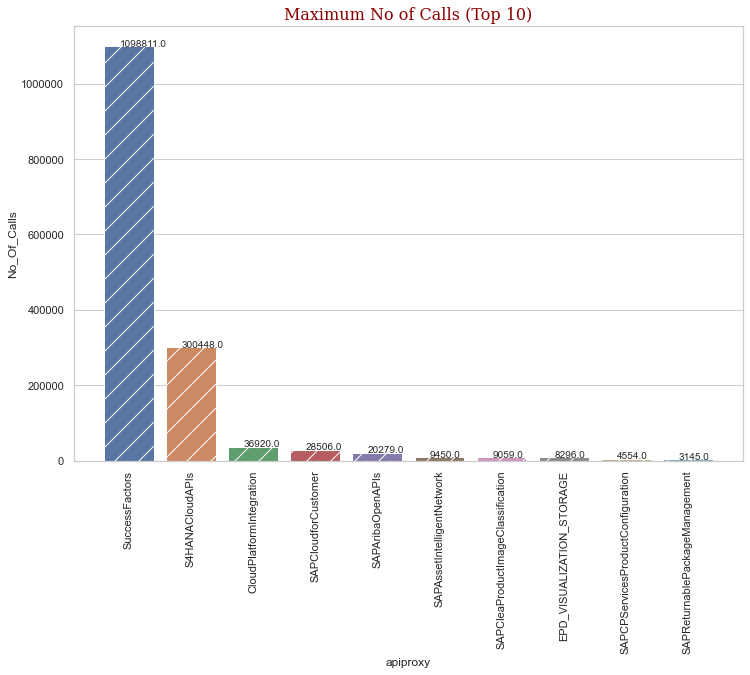

In [75]:
%matplotlib inline

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

ax = sns.barplot(x='apiproxy', y='No_Of_Calls', data=df_sandbox_calls_last_month.head(10),hatch='/')
ax.ticklabel_format(useOffset=False, style='plain', axis='y')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.1))

plt.title("Maximum No of Calls (Top 10)",fontdict={'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,})
plt.xticks(rotation=90)
plt.plot();

# Minimum no of Calls

[]

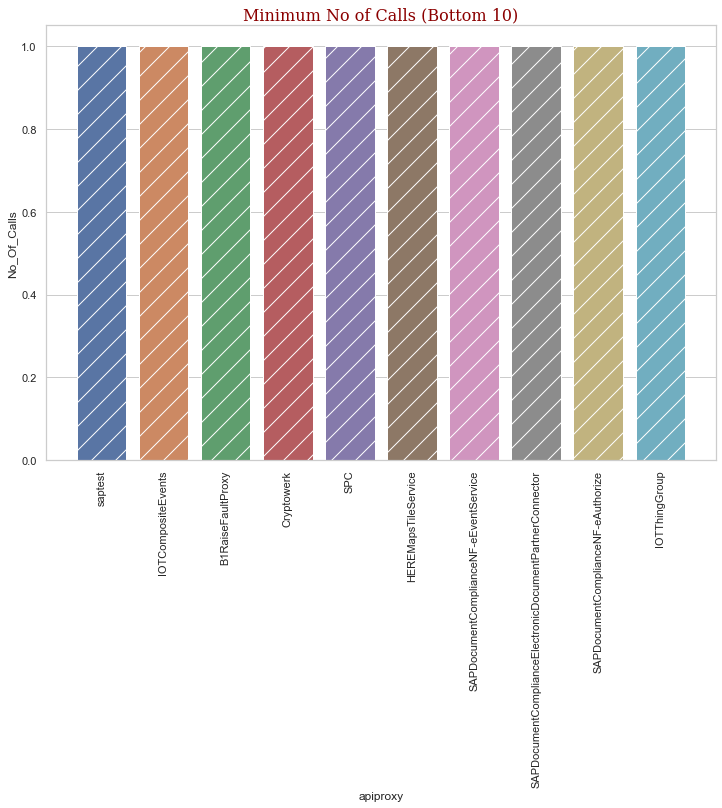

In [76]:
%matplotlib inline

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

ax = sns.barplot(x='apiproxy', y='No_Of_Calls', data=df_sandbox_calls_last_month.sort_values(by='No_Of_Calls').head(10),hatch='/')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.1))

plt.title("Minimum No of Calls (Bottom 10)",fontdict={'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,})
plt.xticks(rotation=90)
plt.plot()

In [154]:
import pandas as pd
#Request class is used to read the APIs and store it in dataframe
import requests
import json

response_package = requests.get("https://api.sap.com/api/1.0/containergroup/ContentTypes?$expand=containers?$format=json")
response_package

<Response [200]>

In [156]:
response_package.json()

{'name': 'ContentTypes',
 'displayName': 'Explore Categories',
 'title': 'Categories',
 'description': 'Explore all the resources available from SAP and its partners',
 'supportedTypes': 'contentType',
 'groupOrder': 3,
 'createdBy': 'XXX',
 'modifiedBy': 'XXX',
 'createdDate': 1639118870830,
 'modifiedDate': 1662370894870,
 'containers': [{'name': 'API',
   'displayName': 'APIs',
   'shortText': 'Find APIs to integrate and extend.',
   'description': 'Explore API content from SAP and partners.',
   'type': 'contentType',
   'icon': 'API',
   'expression': [{'key': 'supportedPlatforms',
     'operator': '=',
     'values': ['SAP API Management', 'SAP Cloud Platform Open Connectors']}],
   'createdBy': 'XXX',
   'modifiedBy': 'XXX',
   'createdDate': 1639118870860,
   'modifiedDate': 1662370894873,
   'aggregation': '{"TotalPackages":226,"PackageType":{"SAP Cloud Platform Open Connectors":{"count":29},"SAP API Management":{"count":197}},"TotalArtifacts":3316,"ArtifactType":{"API":{"subT

In [155]:
response_package.json().keys()

dict_keys(['name', 'displayName', 'title', 'description', 'supportedTypes', 'groupOrder', 'createdBy', 'modifiedBy', 'createdDate', 'modifiedDate', 'containers'])

In [161]:
response_package.json()['containers'][0]['aggregation']

'{"TotalPackages":226,"PackageType":{"SAP Cloud Platform Open Connectors":{"count":29},"SAP API Management":{"count":197}},"TotalArtifacts":3316,"ArtifactType":{"API":{"subType":{"REST":{"count":1173},"ODATA":{"count":734},"ODATAV4":{"count":425},"SOAP":{"count":964}},"count":3296},"PolicyTemplate":{"count":20}}}'

In [162]:
import json
API_Aggregation = json.loads(response_package.json()['containers'][0]['aggregation'])
API_Aggregation

{'TotalPackages': 226,
 'PackageType': {'SAP Cloud Platform Open Connectors': {'count': 29},
  'SAP API Management': {'count': 197}},
 'TotalArtifacts': 3316,
 'ArtifactType': {'API': {'subType': {'REST': {'count': 1173},
    'ODATA': {'count': 734},
    'ODATAV4': {'count': 425},
    'SOAP': {'count': 964}},
   'count': 3296},
  'PolicyTemplate': {'count': 20}}}

In [163]:
API_Aggregation['TotalArtifacts']

3316

In [164]:
API_Aggregation['ArtifactType']['API']['subType']['SOAP']['count']

964

In [1]:
API_Aggregation['ArtifactType']['API']['subType']['REST']['count']

NameError: name 'API_Aggregation' is not defined